In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('weatherHistory.csv')

In [3]:
data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
data['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [6]:
data['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [8]:
data.drop(columns=['Formatted Date', 'Loud Cover', 'Daily Summary'], inplace=True)

In [9]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


### understaning data 

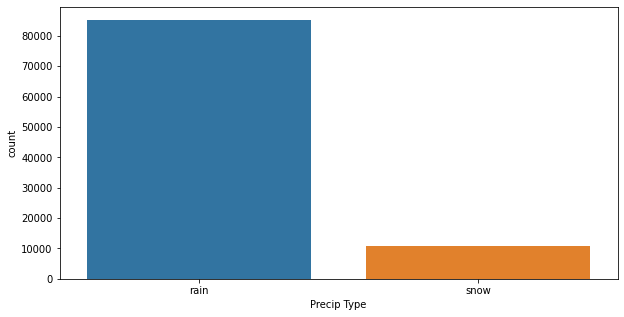

In [10]:
data['Precip Type'].value_counts()
plt.subplots(figsize = (10, 5))
sns.countplot(x='Precip Type', data=data);

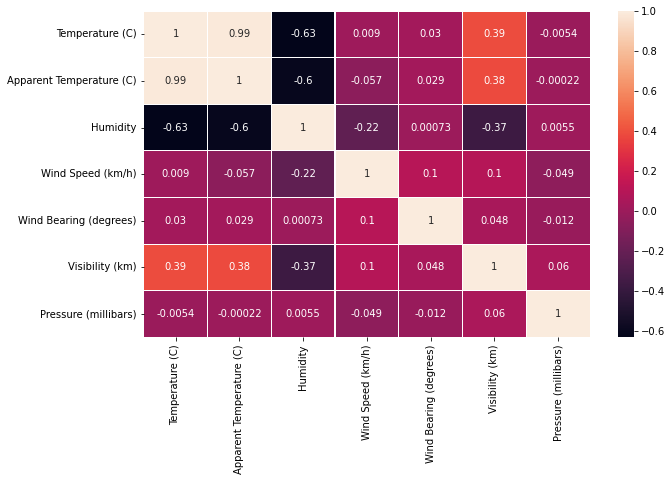

In [11]:
plt.subplots(figsize = (10, 6))
sns.heatmap(data.corr(), linewidth = 0.1, annot=True);

###### Temperature (C) is the most important feature couse of high correlation between it and targrt Apparent Temperature (C)

###### drop Humidity couse of negative correlation between it and target variaable

In [12]:
data.drop(columns=['Humidity'], inplace=True)

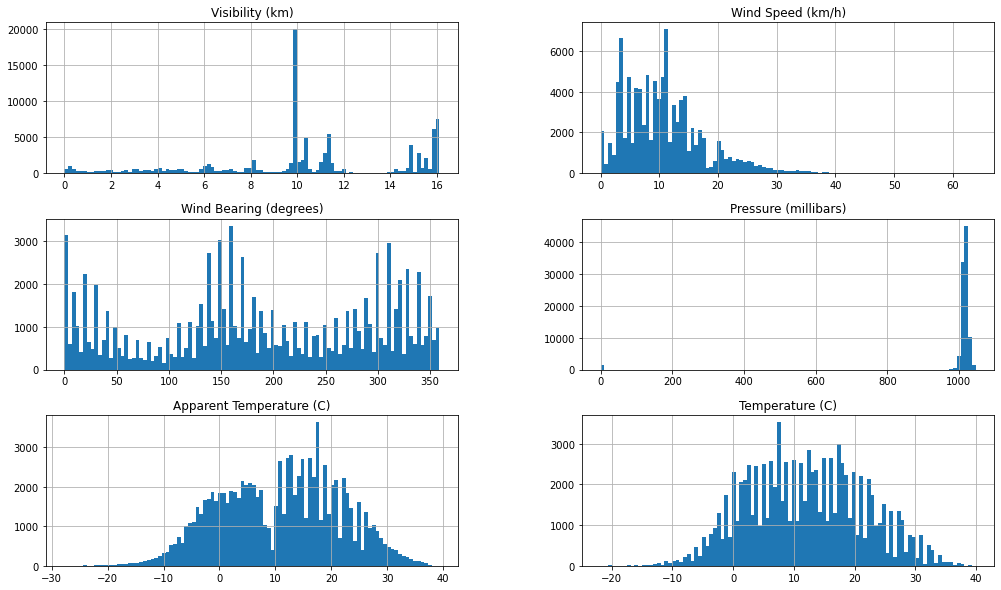

In [13]:
num_col = list(set(data.describe().columns))
data[num_col].hist(bins = 100, figsize = (17, 10));

In [14]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,11.0446,259.0,15.8263,1016.51


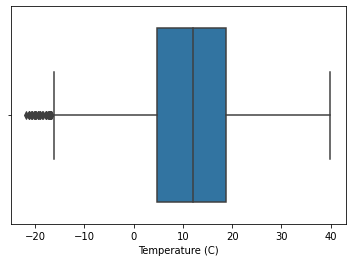

In [15]:
sns.boxplot(data['Temperature (C)']);

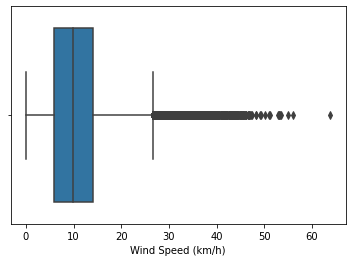

In [16]:
sns.boxplot(data['Wind Speed (km/h)']);

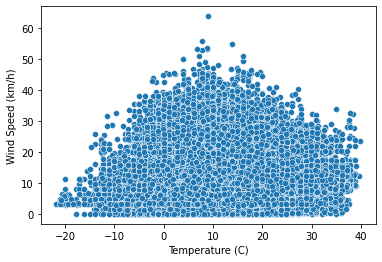

In [17]:
sns.scatterplot(data=data, x='Temperature (C)', y='Wind Speed (km/h)');

In [18]:
data.isna().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [19]:
data.duplicated().sum()

82

In [20]:
data = data.drop_duplicates()

In [21]:
data.skew()

Temperature (C)             0.094103
Apparent Temperature (C)   -0.057734
Wind Speed (km/h)           1.113460
Wind Bearing (degrees)     -0.154657
Visibility (km)            -0.498505
Pressure (millibars)       -8.445812
dtype: float64

#### Numerical and Categorical Columns

In [22]:
def divid_data(data):
    num_col = list(set(data.describe().columns))
    cat_col = list(set(data.columns) - set(num_col))
    return num_col, cat_col

#### Nulls Handling

In [23]:
def get_nulls(data):
    df_nulls = data.isna().sum().reset_index().rename(columns={ 0 : 'nulls_count'})
    return df_nulls[df_nulls['nulls_count'] > 0].sort_values(by=['nulls_count'], ascending=False)

def nulls_handler(data):

    df_nulls = data.isna().sum().reset_index().rename(columns={ 0 : 'nulls_count'})
    df_nulls = df_nulls[df_nulls['nulls_count'] > 0].sort_values(by=['nulls_count'], ascending=False)

    cols_to_drop = []
    fturs_to_fill = []
    rows_to_drop = []

    for _, row in df_nulls.iterrows():
        if row['nulls_count'] / data.shape[0] > 0.25:
            cols_to_drop.append(row["index"])
            print(f"{row['index']} dropped")
        if row['nulls_count'] / data.shape[0] < 0.10:
            rows_to_drop.append(row["index"])
            print(f"Nan rows removed from {row['index']}")
        if row['nulls_count'] / data.shape[0] < 0.25 and row['nulls_count'] / data.shape[0] > 0.10:
            fturs_to_fill.append(row['index'])
            print(f"{row['index']} replaced with mean")
    
    data = data.drop(columns=cols_to_drop)
    data[fturs_to_fill] = data[fturs_to_fill].fillna(data[fturs_to_fill].mean(), axis=0)
    data = data.dropna(subset=rows_to_drop, axis=0)
    
    return data

#### Outliers Clamping

In [24]:
def outliers_clamper(data, num_cols, threshold=1.5):
    for col in num_cols:
        Q1 = np.percentile(data[col], q = 25, interpolation = 'midpoint')
        Q3 = np.percentile(data[col], q = 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        Upper_Bound = Q3 + (threshold*IQR)
        Lower_Bound = Q1 - (threshold*IQR)
        data.loc[data[col] > Upper_Bound, col] = Upper_Bound
        data.loc[data[col] < Lower_Bound, col] = Lower_Bound
    return data

#### Shapiro-Wike Test

In [25]:
def shapiro_test(data, cols, alpha=0.005):
    feats_std_scale = []
    feats_min_max_scale = []
    for col in cols:
        _, p = stats.shapiro(data[col])

        if p > alpha:
            feats_std_scale.append(col)
        else:
            feats_min_max_scale.append(col)

    return feats_std_scale, feats_min_max_scale

#### Skewed Values Log Transformer

In [26]:
def skewness_handler(data):
    skewned_list =[]

    skewness = data.skew()

    for i in range(len(skewness)):
        if abs(skewness[i]) > 1:
            skewned_list.append(data.columns[i])
    for col in skewned_list:
        data[col] = np.log(1 + data[col])

    return data

#### Data Pre-Precessing

In [27]:
train, validation = train_test_split(data, test_size=0.20, random_state=42)

In [28]:
get_nulls(train)

,index,nulls_count
1,Precip Type,417


In [29]:
get_nulls(validation)

,index,nulls_count
1,Precip Type,100


In [30]:
train = nulls_handler(train)

Nan rows removed from Precip Type


In [31]:
validation = nulls_handler(validation)

Nan rows removed from Precip Type


In [32]:
num_col, cat_col = divid_data(data)

In [33]:
train = outliers_clamper(train, num_col)

In [34]:
train = skewness_handler(train)

In [35]:
train.skew()

Temperature (C)             0.098361
Apparent Temperature (C)   -0.056471
Wind Speed (km/h)           0.709755
Wind Bearing (degrees)     -0.157712
Visibility (km)            -0.491435
Pressure (millibars)        0.015248
dtype: float64

#### Handle Categorical Feature

In [36]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
train['Summary'] = label_enc.fit_transform(train['Summary'])
validation['Summary'] = label_enc.transform(validation['Summary'])

In [37]:
train['Precip Type'] = label_enc.fit_transform(train['Precip Type'])
validation['Precip Type'] = label_enc.transform(validation['Precip Type'])

In [38]:
feats_std_scale, feats_min_max_scale = shapiro_test(train, data.columns)

In [39]:
feats_min_max_scale

['Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

In [40]:
feats_std_scale

[]

In [41]:
feats_min_max_scale.remove('Apparent Temperature (C)')

In [42]:
X_train = train[list(set(train.columns) - set(['Apparent Temperature (C)']))]
y_train = train[['Apparent Temperature (C)']]

X_val = validation[list(set(validation.columns) - set(['Apparent Temperature (C)']))]
y_val = validation[['Apparent Temperature (C)']]

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[feats_min_max_scale])
X_train[feats_min_max_scale] = scaler.transform(X_train[feats_min_max_scale])
X_val[feats_min_max_scale] = scaler.transform(X_val[feats_min_max_scale])

### ML Evaluation For Prediction

##### 1 - Linear Regression

In [44]:
X_train_linear = pd.DataFrame(X_train.loc[:, 'Temperature (C)'])

In [45]:
X_val_linear = pd.DataFrame(X_val.loc[:, 'Temperature (C)'])

In [46]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression().fit(X_train_linear, y_train)

In [47]:
y_pred_reg = reg_model.predict(X_train_linear)
r2_score(y_train, y_pred_reg)

0.9853289677213888

In [48]:
y_pred_reg_test = reg_model.predict(X_val_linear)
r2_score(y_val, y_pred_reg_test)

0.985497184580735

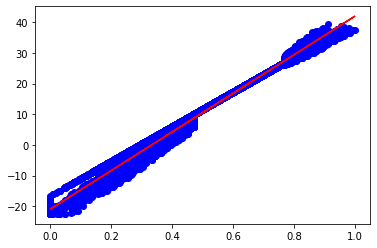

In [49]:
plt.scatter(X_train_linear, y_train, color ='b')
plt.plot(X_train_linear, y_pred_reg, color ='r');

#### Linear Regression From Scratch

In [50]:
X = np.array(X_train_linear)
y = np.array(y_train)

In [51]:
ones = np.ones(len(X))
X = np.insert(X, 0, ones, axis=1)

In [52]:
def Linear_GD(X, y, alpha, iterations):
    m, n = X.shape
    thetas = np.zeros((n, 1))
    J = []
    counter = 0
    old_cost = 0
    for _ in range(iterations):
        hyp = X @ thetas
        error = hyp - y
        cost = np.sum((error**2)) / (2 * m)
        J.append(cost)
        thetas = thetas - (alpha/m) * (X.T @ error)
        if abs(old_cost - cost ) < 1e-3:
            break
        old_cost = cost
        counter += 1
    y_predicted = X @ thetas
    return J, counter, y_predicted

In [53]:
J, counter, y_predicted = Linear_GD(X, y, 0.1, 10000)
print(f"{counter} iteration")
print(f"r2_score = {r2_score(y, y_predicted)}")

1191 iteration
r2_score = 0.981515110845421


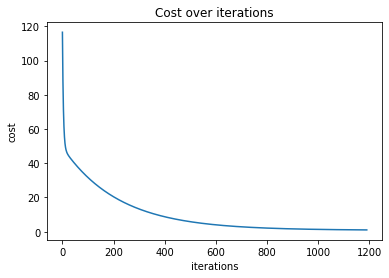

In [54]:
plt.plot(J)
plt.title('Cost over iterations')
plt.ylabel('cost')
plt.xlabel('iterations');

#### 2- Multi-Linear Regression

In [55]:
reg_model_multi = LinearRegression().fit(X_train, y_train)
y_pred_reg = reg_model_multi.predict(X_train)
r2_score(y_train, y_pred_reg)

0.9900282165616514

In [56]:
y_pred_reg = reg_model_multi.predict(X_val)
r2_score(y_val, y_pred_reg)

0.9800026485888302

#### Apply Gradinet Descent on multivariables

In [59]:
X = np.array(X_train)
y = np.array(y_train)
ones = np.ones(len(X))
X = np.insert(X, 0, ones, axis=1)

In [60]:
J, counter, y_predicted = Linear_GD(X, y, 0.1, 10000)
print(f"it tooks {counter} iteration")
print(f"r2_score = {r2_score(y, y_predicted)}")

it tooks 1635 iteration
r2_score = 0.9820625946463


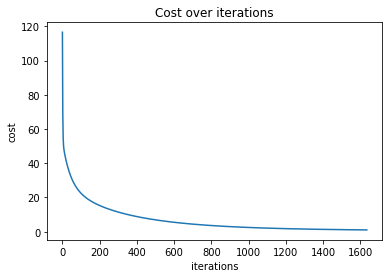

In [61]:
plt.plot(J)
plt.title('Cost over iterations')
plt.ylabel('cost')
plt.xlabel('iterations');

#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_linear)
y_train_poly = poly.fit_transform(y_train)

In [ ]:
X_val_poly = poly.fit_transform(X_val_linear)
y_val_poly = poly.fit_transform(y_val)

In [ ]:
poly_reg = LinearRegression().fit(X_train_poly, y_train_poly)

In [ ]:
y_pred_reg_poly = poly_reg.predict(X_train_poly)
r2_score(y_train_poly, y_pred_reg_poly)

0.9924118746919479

In [ ]:
y_pred_reg_poly_test = poly_reg.predict(X_val_poly)
r2_score(y_val_poly, y_pred_reg_poly_test)

0.9923622719518695

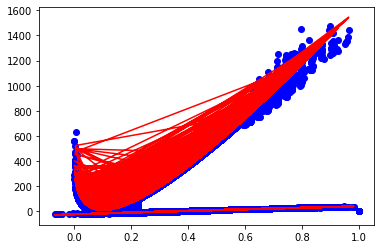

In [ ]:
plt.scatter(X_val_poly, y_val_poly, color ='b')
plt.plot(X_val_poly, y_pred_reg_poly_test, color ='r');

#### Apply Polynomial Regression with gradient descent

In [ ]:
X = np.array(X_train)
y = np.array(y_train)
ones = np.ones(len(X))
X = np.insert(X, 0, ones, axis=1)

In [ ]:
def Poly_GD(X, y, degree, alpha, iterations):

    X_degree = X[:, 2:]**degree
    X = np.append(X, X_degree, axis=1)

    m, n = X.shape
    thetas = np.zeros((n, 1))
    J = []
    counter = 0
    old_cost = 0
    for _ in range(iterations):
        hyp = X @ thetas
        error = hyp - y
        cost = np.sum((error**2)) / (2 * m)
        J.append(cost)
        thetas = thetas - (alpha/m) * (X.T @ error)
        if abs(old_cost - cost ) < 1e-3:
            break
        old_cost = cost
        counter += 1
    y_predicted = X @ thetas
    return J, counter, y_predicted

In [ ]:
J, counter, y_predicted = Poly_GD(X, y, 2, 0.5, 100000)
print(f"{counter} iteration")
print(f"r2_score = {r2_score(y, y_predicted)}")

253 iteration
r2_score = 0.9782284253451188


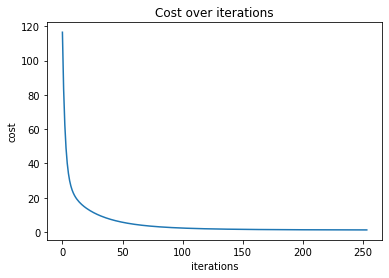

In [ ]:
plt.plot(J)
plt.title('Cost over iterations')
plt.ylabel('cost')
plt.xlabel('iterations');

### SVR

#### 1 - Linear SVR

In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
linear_svr = LinearSVR(tol=1e-7, C=0.5).fit(X_train, y_train)

In [ ]:
y_preds_linear_train = linear_svr.predict(X_train)
r2_score(y_train, y_preds_linear_train)

0.9891619042919753

In [ ]:
y_preds_linear_test = linear_svr.predict(X_val)
r2_score(y_val, y_preds_linear_test)

0.9801078003724988

#### 2 - SVR with Linear Kernel

In [65]:
from sklearn.svm import SVR

In [ ]:
svr_model_linear = SVR(kernel='linear', C=0.5, epsilon=1e-7).fit(X_train, y_train)

In [ ]:
y_pred_svr = svr_model_linear.predict(X_train)
r2_score(y_train, y_pred_svr)

0.9891506074533059

In [ ]:
y_pred_svr_test = svr_model_linear.predict(X_val)
r2_score(y_val, y_pred_svr_test)

0.979452329367485

#### 3 - SVR with rbf Kernel

In [ ]:
svr_model_rbf = SVR(kernel='rbf', C=0.5, tol=1e-7).fit(X_train, y_train)

In [ ]:
y_pred_svr = svr_model_rbf.predict(X_train)
r2_score(y_train, y_pred_svr)

0.9967216920493576

In [ ]:
y_pred_svr_test = svr_model_rbf.predict(X_val)
r2_score(y_val, y_pred_svr_test)

0.9759048112165408

#### 4 - SVR with poly Kernel

In [70]:
svr_model_poly = SVR(kernel='poly', degree=2).fit(X_train_linear, y_train)

In [71]:
y_pred_svr = svr_model_poly.predict(X_train_linear)
r2_score(y_train, y_pred_svr)

0.9325091855036212

In [72]:
y_pred_svr_test = svr_model_poly.predict(X_val_linear)
r2_score(y_val, y_pred_svr_test)

0.9320898236665358